In [7]:
import sys
sys.path.insert(0, '../')
from util import util
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt

Text(0.5,1,'Possible beta distributions')

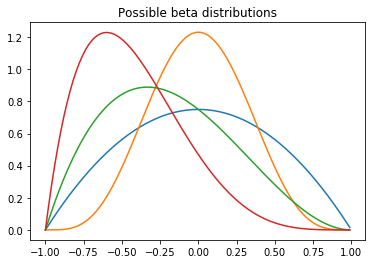

In [27]:
# plot the pdf within the range
x = np.arange (-1, 1, 0.01)

Y1 = st.beta(a = 2,b=2,loc=-1,scale=2)
z = Y1.pdf(x)
plt.plot(x,z)

Y2 = st.beta(a = 5,b=5,loc=-1,scale=2)
z = Y2.pdf(x)
plt.plot(x,z)

Y3 = st.beta(a = 2,b=3,loc=-1,scale=2)
z = Y3.pdf(x)
plt.plot(x,z)

Y4 = st.beta(a = 2,b=5,loc=-1,scale=2)
z = Y4.pdf(x)
plt.plot(x,z)
plt.title("Possible beta distributions")

In [28]:
N = [25,50,100,200]

In [73]:
def fit_beta(Y,n_samples,x_values,fit_type,plot_observed=False,**kwargs):
    #fig, axs = plt.subplots(4,5, figsize=(15, 15), facecolor='w', edgecolor='k')
    #fig.subplots_adjust(hspace = .5, wspace=.001)
    fig, axs = plt.subplots(2,5, figsize=(12, 8), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i in range(10):
        S = Y.rvs(n_samples)
        
        if fit_type.lower() == 'mle':
            # fit a beta distribution using MLE
            a1, b1, loc1, scale1 = st.beta.fit(S,**kwargs)

            fitted_beta = st.beta(a = a1,b=b1,loc=loc1,scale=scale1)

            #plt.hist(S,normed=True)

            y_values = fitted_beta.pdf(x_values)
        elif fit_type.lower() == 'kde':
            # fit a kde, optimising bandwidth
            fitted = st.gaussian_kde(S,bw_method='scott')
            y_values = fitted.pdf(x_values)
        else:
            raise ValueError("Not a valid estimation method")
        
        if plot_observed:
            axs[i].hist(S,normed=True,label='Observed samples')
        axs[i].plot(x_values, y_values,label="Fitted pdf")
        axs[i].plot(x_values, Y.pdf(x_values),label='True pdf')
        axs[i].yaxis.set_visible(False)
    axs[i].legend()

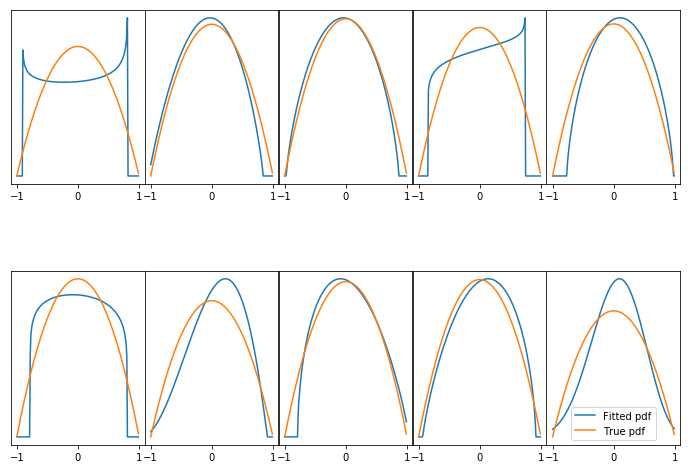

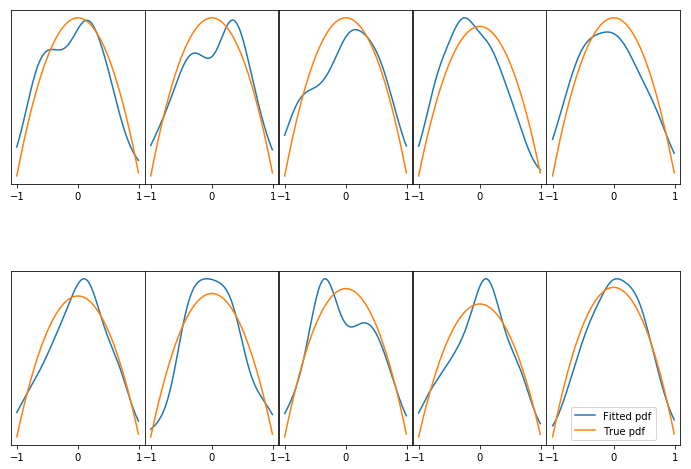

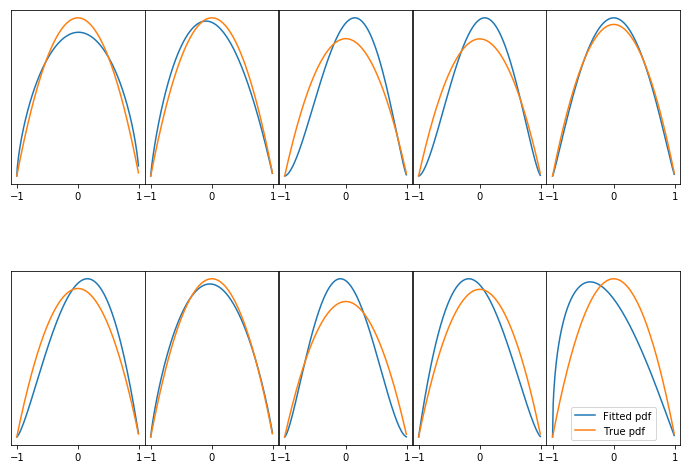

In [74]:
fit_beta(Y1,50,x,'mle')
fit_beta(Y1,50,x,'kde')
fit_beta(Y1,50,x,'mle',floc=-1,fscale=2)

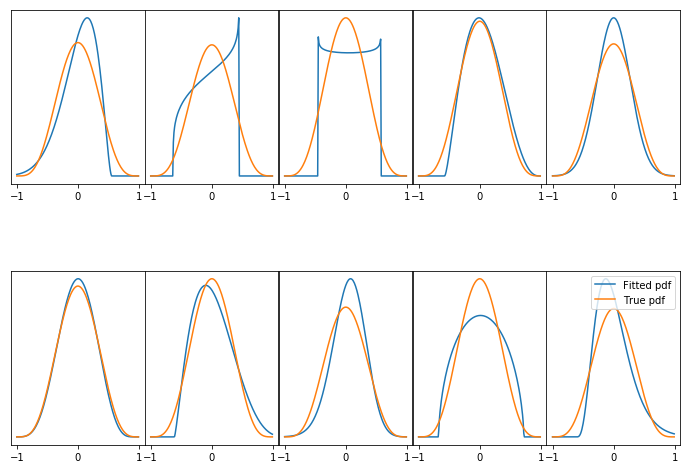

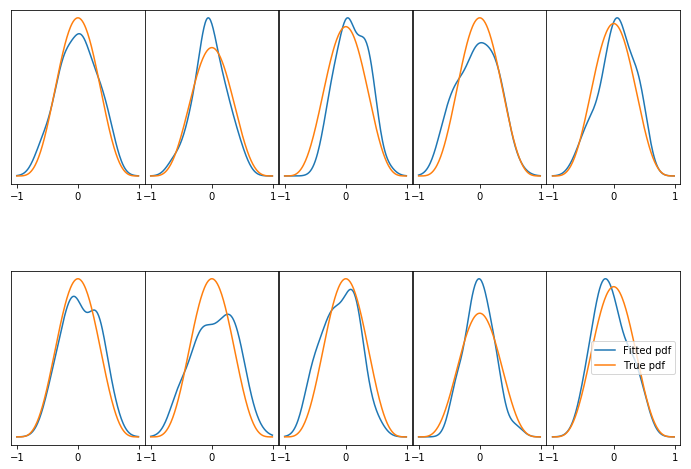

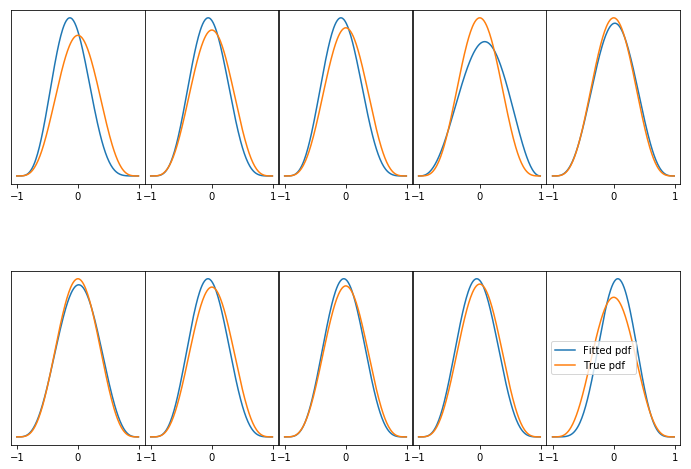

In [75]:
fit_beta(Y2,50,x,'mle')
fit_beta(Y2,50,x,'kde')
fit_beta(Y2,50,x,'mle',floc=-1,fscale=2)

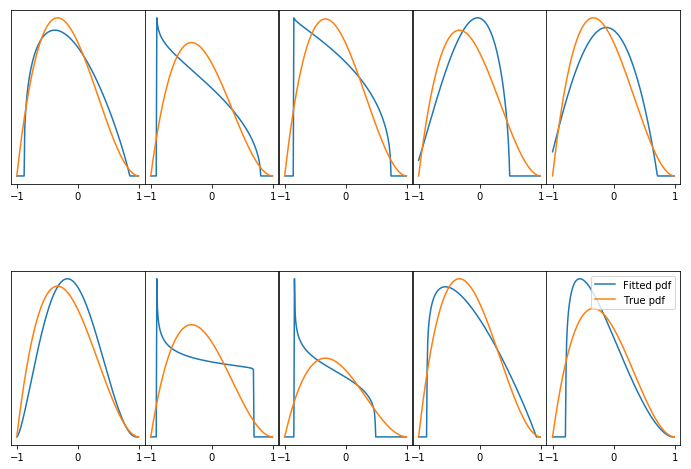

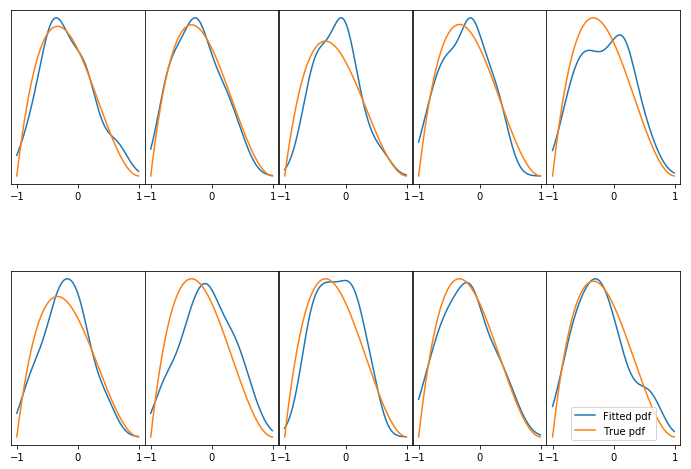

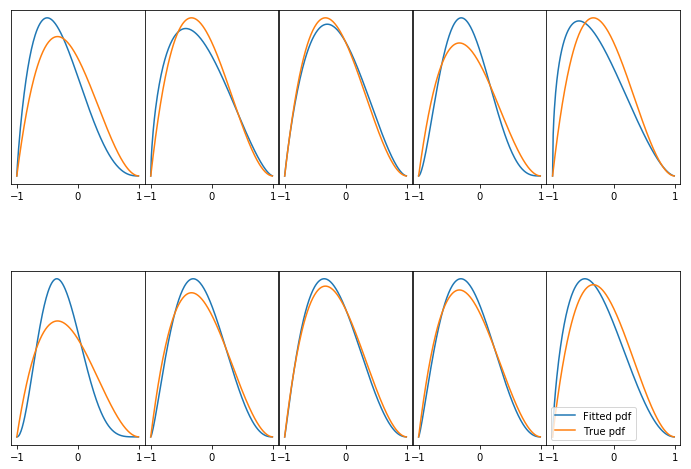

In [76]:
fit_beta(Y3,50,x,'mle')
fit_beta(Y3,50,x,'kde')
fit_beta(Y3,50,x,'mle',floc=-1,fscale=2)

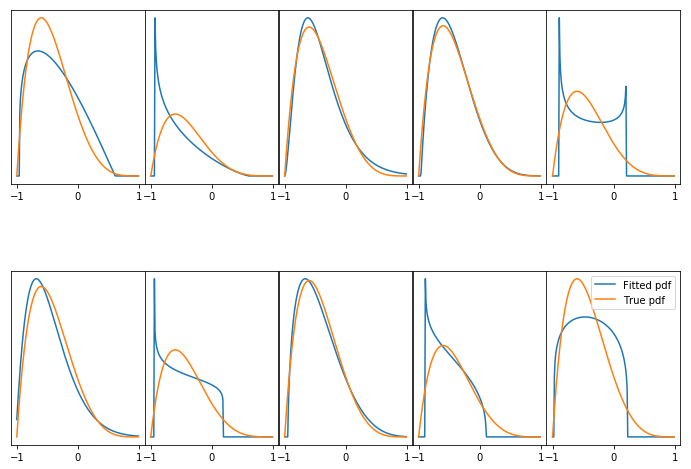

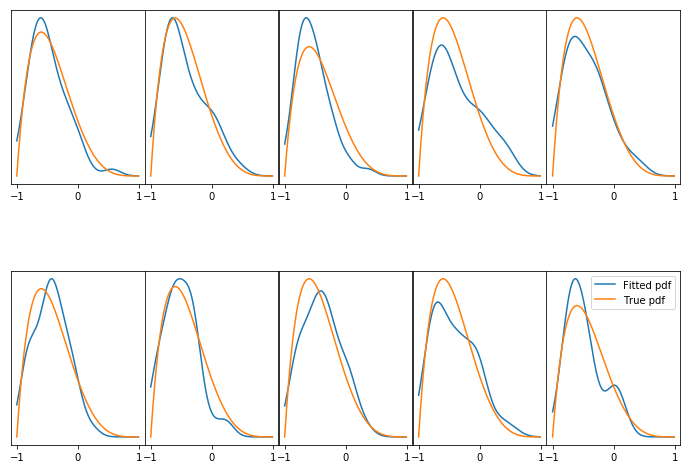

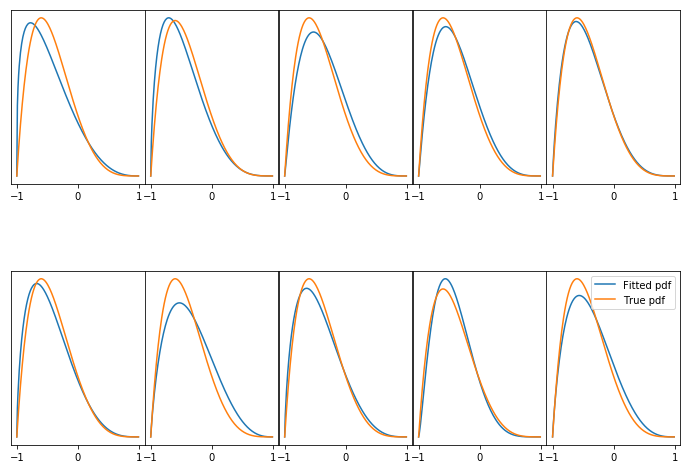

In [77]:
fit_beta(Y4,50,x,'mle')
fit_beta(Y4,50,x,'kde')
fit_beta(Y4,50,x,'mle',floc=-1,fscale=2)